In [1]:
#poetry add plotly
#poetry add nbformat

In [2]:
# Zelle 1: Imports und Setup
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
pio.renderers.default = "jupyterlab"

## Das biologische Neuron

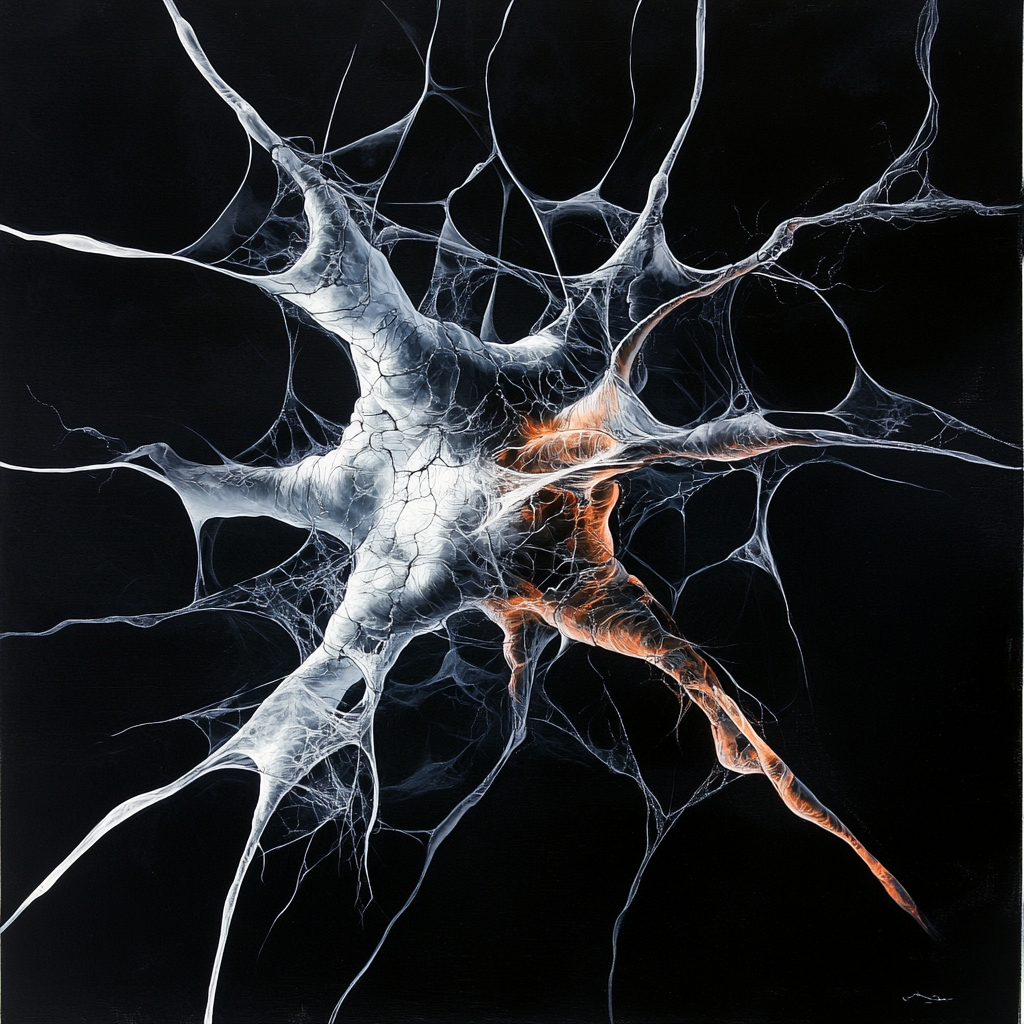

In [3]:
from IPython.display import Image, display

display(Image(filename='../assets/images/neuron.png', width=400))

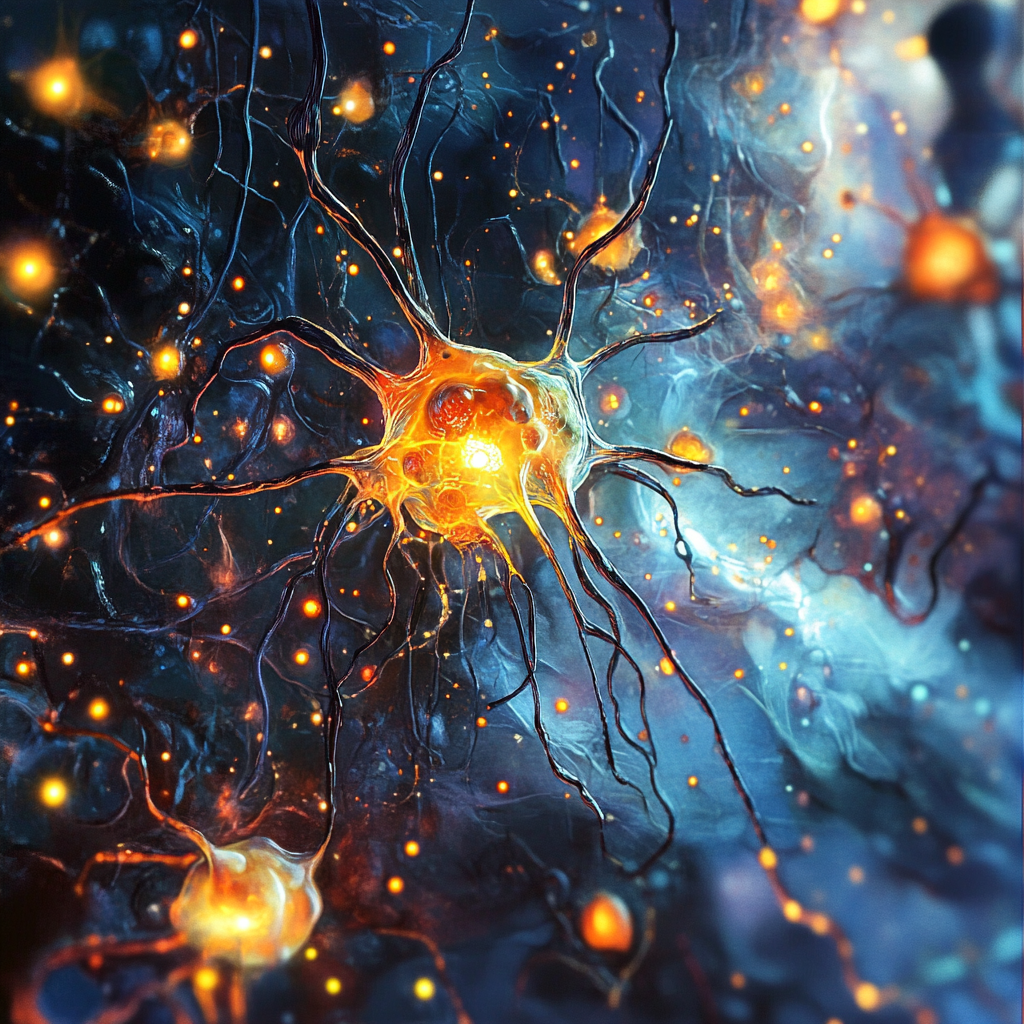

In [4]:
display(Image(filename='../assets/images/neural_network.png', width=400))

## Das künstliche Neuron

In [22]:
import plotly.graph_objects as go
import numpy as np

# Konstanten
NODE_SIZE = dict(
    input=50,
    neuron=70,
    output=50
)
X_POSITIONS = dict(
    inputs=-2,
    neuron=0,
    output=2
)
COLORS = dict(
    input='rgba(173, 216, 230, 0.7)',  # helleres, transparenteres Blau
    neuron='rgba(144, 238, 144, 0.7)',  # helleres, transparenteres Grün
    output='rgba(250, 128, 114, 0.7)',  # helleres, transparenteres Lachs
    lines='rgba(128, 128, 128, 0.4)',   # transparenteres Grau
    bias='rgba(255, 218, 185, 0.7)'     # Pfirsich für Bias
)

fig = go.Figure()

# Input Neuronen (jetzt mit 4 Inputs inklusive Bias)
input_y = [-1.5, -0.5, 0.5, 1.5]  # Angepasste Y-Positionen für 4 Inputs

# Input Neuronen
for i, y in enumerate(input_y[:-1]):  # Alle außer letzter (Bias)
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['inputs']], 
        y=[y],
        mode='markers+text',
        marker=dict(
            size=NODE_SIZE['input'], 
            color=COLORS['input'],
            line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
        ),
        text=f'x{i}',
        textposition='middle center',
        name='Input' if i == 0 else None,
        showlegend=i == 0
    ))

# Bias Neuron (letzter Input)
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['inputs']], 
    y=[input_y[-1]],
    mode='markers+text',
    marker=dict(
        size=NODE_SIZE['input'], 
        color=COLORS['bias'],
        line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
    ),
    text='1',  # Bias Input ist immer 1
    textposition='middle center',
    name='Bias'
))

# Neuron
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['neuron']], 
    y=[0],
    mode='markers+text',
    marker=dict(
        size=NODE_SIZE['neuron'], 
        color=COLORS['neuron'],
        line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
    ),
    text='ReLU',
    textposition='middle right',
    name='Neuron'
))

# Output
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['output']], 
    y=[0],
    mode='markers+text',
    marker=dict(
        size=NODE_SIZE['output'], 
        color=COLORS['output'],
        line=dict(color='rgba(70, 70, 70, 0.8)', width=1)
    ),
    text='y',
    textposition='middle center',
    name='Output'
))

# Verbindungen mit Gewichten - jetzt mit Text in der Mitte der Linie
for i, y in enumerate(input_y):
    # Berechne Mittelpunkt der Linie für Gewichtstext
    x_mid = (X_POSITIONS['inputs'] + X_POSITIONS['neuron']) / 2
    y_mid = (y + 0) / 2  # Mitte zwischen Input und Neuron
    
    # Gewichtstext
    weight_text = 'b' if i == len(input_y)-1 else f'w{i}'
    
    # Linie
    fig.add_trace(go.Scatter(
        x=[X_POSITIONS['inputs']+0.2, X_POSITIONS['neuron']-0.2],
        y=[y, 0],
        mode='lines',
        line=dict(color=COLORS['lines'], width=2),
        showlegend=False
    ))
    
    # Separater Text-Trace für das Gewicht
    fig.add_trace(go.Scatter(
        x=[x_mid],
        y=[y_mid],
        mode='text',
        text=weight_text,
        textposition='middle center',
        showlegend=False
    ))

# Verbindung zum Output
fig.add_trace(go.Scatter(
    x=[X_POSITIONS['neuron']+0.2, X_POSITIONS['output']-0.2],
    y=[0, 0],
    mode='lines',
    line=dict(color=COLORS['lines'], width=2),
    showlegend=False
))

# Formel 
formula = 'y = ReLU(Σ wᵢxᵢ + b)'

fig.add_annotation(
    x=X_POSITIONS['neuron'], 
    y=2,
    text=formula,
    showarrow=False,
    font=dict(size=14, family='Computer Modern'),
    bgcolor='rgba(255, 255, 255, 0.9)',
    bordercolor='rgba(0, 0, 0, 0.3)',
    borderwidth=1,
    borderpad=10
)

# Layout
fig.update_layout(
    title=dict(
        text='Einzelnes Neuron mit Gewichteter Summe und ReLU Aktivierung',
        x=0.5,
        y=0.95,
        font=dict(size=16)
    ),
    showlegend=True,
    xaxis=dict(showticklabels=False, range=[-3.5, 3.5]),
    yaxis=dict(showticklabels=False, range=[-2.5, 3.5]),
    plot_bgcolor='white',
    width=800,
    height=600,
    margin=dict(t=100, b=50)
)

fig.show()

# Aktivierungsfunktionen

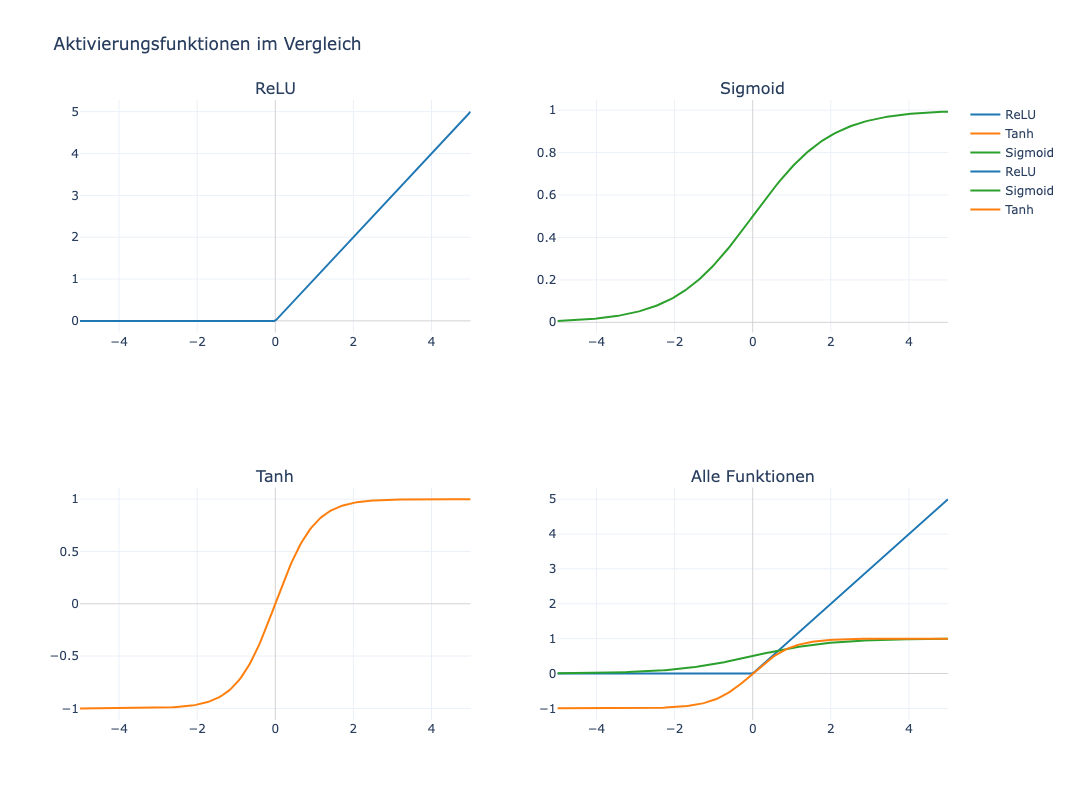

In [9]:
import plotly.graph_objects as go
import plotly.subplots as sp
import numpy as np

# Daten vorbereiten
x = np.linspace(-5, 5, 200)

# Aktivierungsfunktionen
relu = np.maximum(0, x)
sigmoid = 1 / (1 + np.exp(-x))
tanh = np.tanh(x)

# Figure mit Subplots erstellen
fig = sp.make_subplots(rows=2, cols=2, 
                       subplot_titles=('ReLU', 'Sigmoid', 'Tanh', 'Alle Funktionen'))

# ReLU
fig.add_trace(
    go.Scatter(x=x, y=relu, name='ReLU', line=dict(color='#1f77b4')),
    row=1, col=1
)

# Tanh
fig.add_trace(
    go.Scatter(x=x, y=tanh, name='Tanh', line=dict(color='#ff7f0e')),
    row=2, col=1
)

# Sigmoid
fig.add_trace(
    go.Scatter(x=x, y=sigmoid, name='Sigmoid', line=dict(color='#2ca02c')),
    row=1, col=2
)



# Alle zusammen
fig.add_trace(
    go.Scatter(x=x, y=relu, name='ReLU', line=dict(color='#1f77b4')),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=x, y=sigmoid, name='Sigmoid', line=dict(color='#2ca02c')),
    row=2, col=2
)
fig.add_trace(
    go.Scatter(x=x, y=tanh, name='Tanh', line=dict(color='#ff7f0e')),
    row=2, col=2
)

# Layout anpassen
fig.update_layout(
    title_text="Aktivierungsfunktionen im Vergleich",
    showlegend=True,
    height=800,
    template='plotly_white',
    hovermode='x'
)

# Achsen anpassen
fig.update_xaxes(zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey')

fig.show()

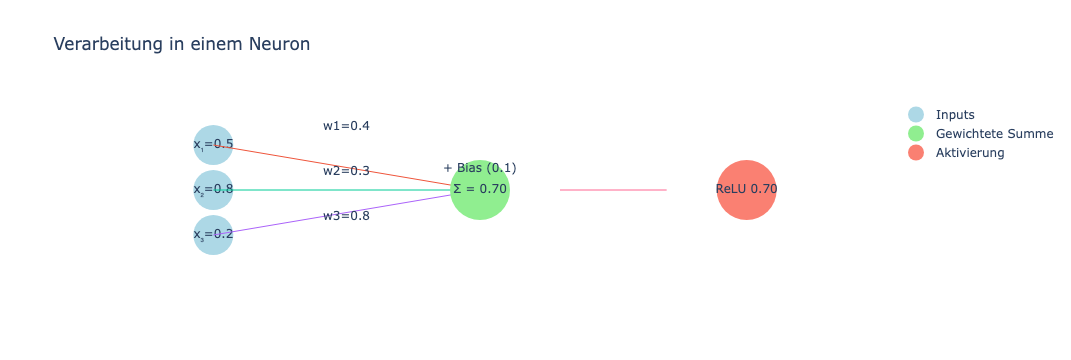

In [8]:
import plotly.graph_objects as go
import numpy as np

# Beispiel mit 3 Inputs
x = np.array([0.5, 0.8, 0.2])  # Input-Signale
w = np.array([0.4, 0.3, 0.8])  # Gewichte
b = 0.1                        # Bias

# Gewichtete Summe berechnen
z = np.sum(x * w) + b

# Visualisierung
fig = go.Figure()

# Positionen für die Visualisierung
y_positions = np.array([3, 2, 1])

# Input-Signale
fig.add_trace(go.Scatter(
    x=[0]*3, y=y_positions,
    mode='markers+text',
    marker=dict(size=40, color='lightblue'),
    text=[f'x₁={x[0]}', f'x₂={x[1]}', f'x₃={x[2]}'],
    name='Inputs'
))

# Gewichte als Beschriftung der Pfeile
for i in range(3):
    fig.add_annotation(
        x=0.5, y=y_positions[i],
        text=f'w{i+1}={w[i]}',
        showarrow=False,
        yshift=20
    )

# Pfeile von Inputs zum Neuron
for i in range(3):
    fig.add_trace(go.Scatter(
        x=[0, 1], y=[y_positions[i], 2],
        mode='lines+text',
        line=dict(width=1),
        showlegend=False
    ))

# Neuron (Summe)
fig.add_trace(go.Scatter(
    x=[1], y=[2],
    mode='markers+text',
    marker=dict(size=60, color='lightgreen'),
    text=f'Σ = {z:.2f}',
    name='Gewichtete\nSumme'
))

# Bias
fig.add_annotation(
    x=1, y=2.5,
    text=f'+ Bias ({b})',
    showarrow=False
)

# Aktivierungsfunktion (ReLU als Beispiel)
fig.add_trace(go.Scatter(
    x=[2], y=[2],
    mode='markers+text',
    marker=dict(size=60, color='salmon'),
    text=f'ReLU\n{max(0, z):.2f}',
    name='Aktivierung'
))

# Pfeil zur Aktivierung
fig.add_trace(go.Scatter(
    x=[1.3, 1.7], y=[2, 2],
    mode='lines+text',
    line=dict(width=1),
    showlegend=False
))

# Layout anpassen
fig.update_layout(
    title='Verarbeitung in einem Neuron',
    showlegend=True,
    xaxis=dict(showticklabels=False, range=[-0.5, 2.5]),
    yaxis=dict(showticklabels=False, range=[0, 4]),
    plot_bgcolor='white'
)

fig.show()

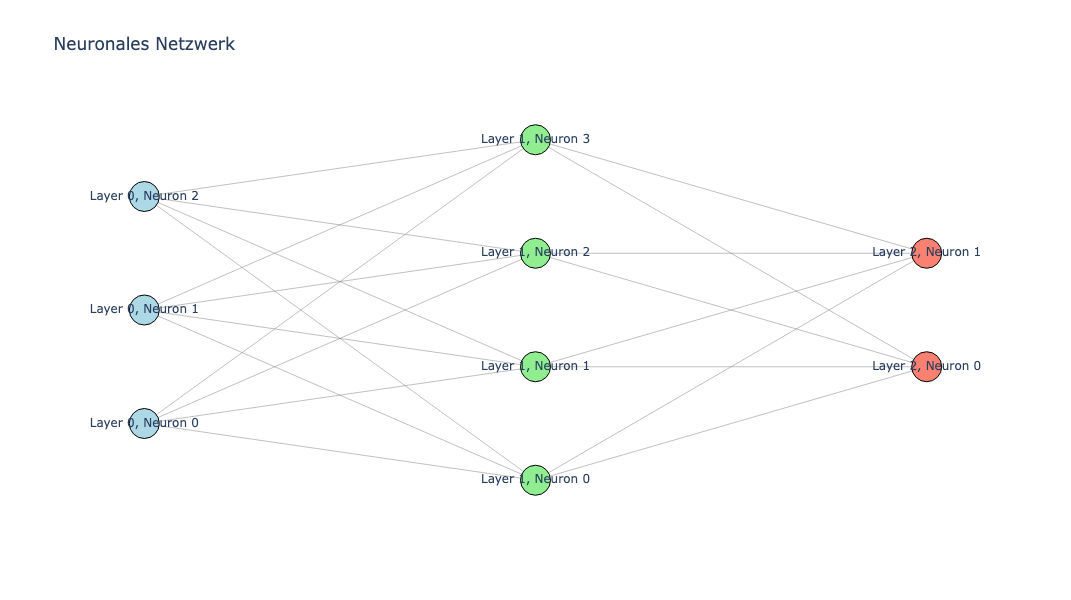

In [6]:
import plotly.graph_objects as go
import numpy as np

def create_neural_net_plotly(n_inputs=3, n_hidden=4, n_outputs=2):
    # Positionen der Neuronen
    layers = [n_inputs, n_hidden, n_outputs]
    layer_spacing = 1
    neuron_spacing = 1
    
    # Knoten erstellen
    nodes_x = []
    nodes_y = []
    nodes_text = []
    nodes_color = []
    
    for i, layer_size in enumerate(layers):
        for j in range(layer_size):
            nodes_x.append(i * layer_spacing)
            nodes_y.append(j * neuron_spacing - (layer_size-1) * neuron_spacing/2)
            nodes_text.append(f'Layer {i}, Neuron {j}')
            nodes_color.append(['lightblue', 'lightgreen', 'salmon'][i])
    
    # Kanten erstellen
    edges_x = []
    edges_y = []
    
    node_indices = np.cumsum([0] + layers)
    
    for i in range(len(layers)-1):
        for j in range(layers[i]):
            for k in range(layers[i+1]):
                start_idx = node_indices[i] + j
                end_idx = node_indices[i+1] + k
                edges_x.extend([nodes_x[start_idx], nodes_x[end_idx], None])
                edges_y.extend([nodes_y[start_idx], nodes_y[end_idx], None])
    
    # Plot erstellen
    fig = go.Figure()
    
    # Kanten hinzufügen
    fig.add_trace(go.Scatter(
        x=edges_x,
        y=edges_y,
        mode='lines',
        line=dict(color='gray', width=0.5),
        hoverinfo='none'
    ))
    
    # Knoten hinzufügen
    fig.add_trace(go.Scatter(
        x=nodes_x,
        y=nodes_y,
        mode='markers+text',
        marker=dict(
            size=30,
            color=nodes_color,
            line=dict(color='black', width=1)
        ),
        text=nodes_text,
        hoverinfo='text'
    ))
    
    # Layout anpassen
    fig.update_layout(
        title='Neuronales Netzwerk',
        showlegend=False,
        plot_bgcolor='white',
        height=600,
        width=800,
        xaxis=dict(
            showgrid=False,
            zeroline=False,
            showticklabels=False
        ),
        yaxis=dict(
            showgrid=False,
            zeroline=False,
            showticklabels=False
        )
    )
    
    fig.show()

# Netzwerk erstellen
create_neural_net_plotly(3, 4, 2)

# Beispiel für die Transformation mittels Aktivierungsfunktionen

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

# Ein einfaches Beispielbild erstellen (oder du lädst ein echtes Bild)
size = 100
x = np.linspace(-4, 4, size)
y = np.linspace(-4, 4, size)
X, Y = np.meshgrid(x, y)
image = np.sin(X) * np.cos(Y)  # erzeugt ein interessantes Muster

# ReLU Aktivierungsfunktion
def relu(x):
    return np.maximum(0, x)

# Sigmoid Aktivierungsfunktion
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plot erstellen
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Originalbild
axes[0].imshow(image, cmap='viridis')
axes[0].set_title('Original')
axes[0].axis('off')

# ReLU aktiviert
axes[1].imshow(relu(image), cmap='viridis')
axes[1].set_title('Nach ReLU')
axes[1].axis('off')

# Sigmoid aktiviert
axes[2].imshow(sigmoid(image), cmap='viridis')
axes[2].set_title('Nach Sigmoid')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Bonus: Lass uns auch die Verteilung der Werte anschauen
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(image.flatten(), bins=50)
axes[0].set_title('Original Werteverteilung')
axes[0].set_xlabel('Wert')
axes[0].set_ylabel('Häufigkeit')

axes[1].hist(relu(image).flatten(), bins=50)
axes[1].set_title('ReLU Werteverteilung')
axes[1].set_xlabel('Wert')

axes[2].hist(sigmoid(image).flatten(), bins=50)
axes[2].set_title('Sigmoid Werteverteilung')
axes[2].set_xlabel('Wert')

plt.tight_layout()
plt.show()